# SPORT FORECASTING

## 1. INTRODUCTION

### 1.1 Data

We can get the data from the [website](https://www.football-data.co.uk/data.php). This website contains the historical information of matches and betting odds data. In this assignment, we used the data for English Premier League back to 2018. You can get the data through this [page](https://www.football-data.co.uk/englandm.php). You can find all the meaning of columns from this [link](https://www.football-data.co.uk/notes.txt) or this [link](https://docs.google.com/spreadsheets/d/16aZYItIHmGmqaLnRaW0XUMcwFFNxhcLB6nKqpzog06c/)

### 1.2 Objective

In this assignment, we want to figure out the decisions of bookmakers (betting companies) and the behaviour of the Premier League. To do so, we will try to understand the relationship among the odds of home, draw and away.
Throughout the assignment, we will use __numpy__, __pandas__, __matplotlib.pyplot__, __itertools.chain__ and __scipy.stats.poisson__ packages.

In [1]:
## Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from scipy.stats import poisson
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

We can get the data with these commands.

In [2]:
data0 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv", usecols = list(chain(*[[1], list(range(3,41))])))
data1 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/E0.csv", usecols = list(chain(*[[1], list(range(3,41))])))
data2 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1819/E0.csv", usecols = range(1, 40))
data = pd.concat([data0, data1, data2])
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD
0,12/09/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,...,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,4.20
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,0,H,Jj Moss,...,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,3.20
2,12/09/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,...,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,5.75
3,12/09/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,...,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,3.40
4,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,A Taylor,...,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,3.50


There are many columns in these datasets but we get a subset of columns for this assignment.

## 2. TASKS

### 2.1 Task 1

At the beginning, we need to plot the data to understand the distribution. To do so, we can use the histogram.

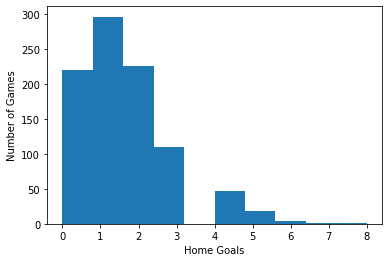

In [3]:
_ = plt.hist(data["FTHG"])
_ = plt.xlabel("Home Goals")
_ = plt.ylabel("Number of Games")

This is the histogram of the home goals column.

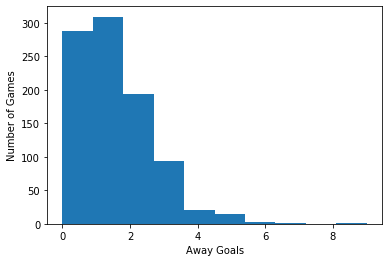

In [4]:
_ = plt.hist(data["FTAG"])
_ = plt.xlabel("Away Goals")
_ = plt.ylabel("Number of Games")

This is the histogram of the away goals column.

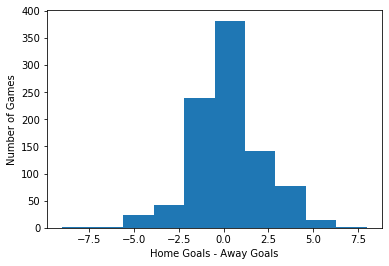

In [5]:
_ = plt.hist(data["FTHG"] - data["FTAG"])
_ = plt.xlabel("Home Goals - Away Goals")
_ = plt.ylabel("Number of Games")

This is the histogram of the subtracting the away goals column from home goals column.

When we observe the histograms, home goals and away goals are looks like distributed with Poisson distribution. Here is an example of the Poisson distribution.

![Poisson Distribution](http://www.umass.edu/wsp/images/poisson3.gif)

This data (home / away column) can be distributed with Poisson distribution with respect to their histograms. We can generate values from a Poisson distribution whose lambda value is the mean of the home / away goals and input values are the integer values from the minimum to maximum value of that column.

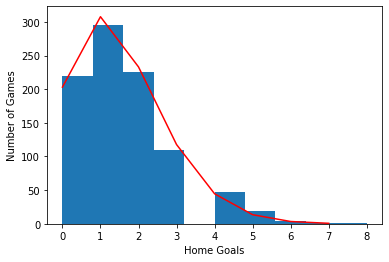

In [6]:
xfit = np.arange(np.min(data["FTHG"]), np.max(data["FTHG"]), 1)
yfit = poisson.pmf(k = xfit,mu = np.mean(data["FTHG"]))

_ = plt.hist(data["FTHG"])
_ = plt.plot(xfit, yfit * len(data), color = 'red')
_ = plt.xlabel("Home Goals")
_ = plt.ylabel("Number of Games")

When we observe the line and histogram, they almost match with each other. This means that home goals column can have Poisson distribution.

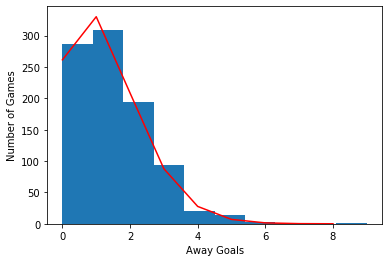

In [7]:
xfit = np.arange(np.min(data["FTAG"]), np.max(data["FTAG"]), 1)
yfit = poisson.pmf(k = xfit,mu = np.mean(data["FTAG"]))

_ = plt.hist(data["FTAG"])
_ = plt.plot(xfit, yfit * len(data), color = 'red')
_ = plt.xlabel("Away Goals")
_ = plt.ylabel("Number of Games")

When we observe the line and histogram, they almost match with each other. This means that away goals column can have Poisson distribution.

### 2.2 Task 2

From now on, we can find the probabilities of these odds. It can be calculated with taking the inverse of the odds. We use the odds information of __Bet365__, __Bet&Win__, __Interwetten__ and __Pinnacle__ bookmakers odds information.

In [8]:
#B365
data["B365_prob_home"] = 1 / data["B365H"]
data["B365_prob_draw"] = 1 / data["B365D"]
data["B365_prob_away"] = 1 / data["B365A"]

#BW
data["BW_prob_home"] = 1 / data["BWH"]
data["BW_prob_draw"] = 1 / data["BWD"]
data["BW_prob_away"] = 1 / data["BWA"]

#IW
data["IW_prob_home"] = 1 / data["IWH"]
data["IW_prob_draw"] = 1 / data["IWD"]
data["IW_prob_away"] = 1 / data["IWA"]

#PS
data["PS_prob_home"] = 1 / data["PSH"]
data["PS_prob_draw"] = 1 / data["PSD"]
data["PS_prob_away"] = 1 / data["PSA"]

When we observe the probabilities, we can see that their sum are not equal to 1 (for example, for the first row, sum of the probabilities of Bet365 is 1.0512083). This is an expected outcome, because the 5% margin is the bookmaker’s gain from this game. So, we need to normalize the probabilities with dividing each of them with the sum of three probabilities.

In [9]:
#B365 normalized
data["B365_norm_prob_home"] = data["B365_prob_home"] / (data["B365_prob_home"] + data["B365_prob_draw"] + data["B365_prob_away"])
data["B365_norm_prob_draw"] = data["B365_prob_draw"] / (data["B365_prob_home"] + data["B365_prob_draw"] + data["B365_prob_away"])
data["B365_norm_prob_away"] = data["B365_prob_away"] / (data["B365_prob_home"] + data["B365_prob_draw"] + data["B365_prob_away"])

#BW normalized
data["BW_norm_prob_home"] = data["BW_prob_home"] / (data["BW_prob_home"] + data["BW_prob_draw"] + data["BW_prob_away"])
data["BW_norm_prob_draw"] = data["BW_prob_draw"] / (data["BW_prob_home"] + data["BW_prob_draw"] + data["BW_prob_away"])
data["BW_norm_prob_away"] = data["BW_prob_away"] / (data["BW_prob_home"] + data["BW_prob_draw"] + data["BW_prob_away"])

#IW normalized
data["IW_norm_prob_home"] = data["IW_prob_home"] / (data["IW_prob_home"] + data["IW_prob_draw"] + data["IW_prob_away"])
data["IW_norm_prob_draw"] = data["IW_prob_draw"] / (data["IW_prob_home"] + data["IW_prob_draw"] + data["IW_prob_away"])
data["IW_norm_prob_away"] = data["IW_prob_away"] / (data["IW_prob_home"] + data["IW_prob_draw"] + data["IW_prob_away"])

#PS normalized
data["PS_norm_prob_home"] = data["PS_prob_home"] / (data["PS_prob_home"] + data["PS_prob_draw"] + data["PS_prob_away"])
data["PS_norm_prob_draw"] = data["PS_prob_draw"] / (data["PS_prob_home"] + data["PS_prob_draw"] + data["PS_prob_away"])
data["PS_norm_prob_away"] = data["PS_prob_away"] / (data["PS_prob_home"] + data["PS_prob_draw"] + data["PS_prob_away"])

Now, we try to understand whether the bookmaker is good enough to predict the draw result. To do so, firstly we need to divide the data into some bins and then get the mean of the draw result in these bins. After preparing the data, we can plot these results with their probabilities. We used the Bet365 information for this action.

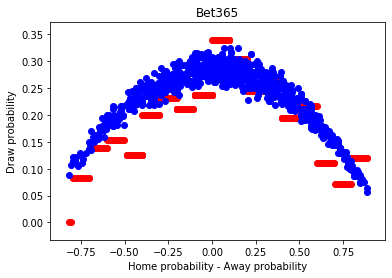

In [10]:
bin_cond = [-np.inf, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, np.inf]
bin_lab = list(map(str, range(1, 21)))
data["bins"] = pd.cut(data["B365_norm_prob_home"] - data["B365_norm_prob_away"], bins=bin_cond, labels=bin_lab)

data["FTR_draw"] = data["FTR"].apply(lambda x: 1 if x == 'D' else 0)
FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_B365'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["B365_norm_prob_home"] - data["B365_norm_prob_away"], data['draw_mean_B365'], color = 'red')
_ = plt.scatter(data["B365_norm_prob_home"] - data["B365_norm_prob_away"], data['B365_norm_prob_draw'], color = 'blue')
_ = plt.title('Bet365')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can see that the actual draw probability is higher than the bookmaker’s probability. It means that if we bet draw for the matches which subtraction probability of home probability from away probability is between 0 and 0.1, we can earn money in the long run. Because the bookmaker gives more odds than the actual odds for these matches. We can do the similar operation for the other bookmakers.

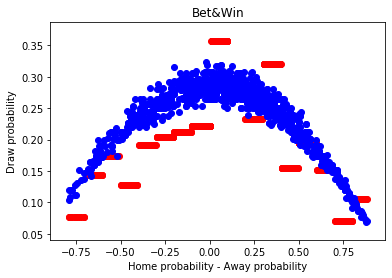

In [11]:
data["bins"] = pd.cut(data["BW_norm_prob_home"] - data["BW_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_BW'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["BW_norm_prob_home"] - data["BW_norm_prob_away"], data['draw_mean_BW'], color = 'red')
_ = plt.scatter(data["BW_norm_prob_home"] - data["BW_norm_prob_away"], data['BW_norm_prob_draw'], color = 'blue')
_ = plt.title('Bet&Win')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can see that the same result is applicable for the range between 0 and 0.1 and the range between 0.3 and 0.4.

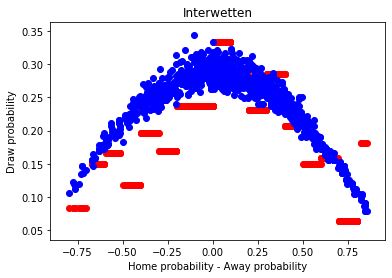

In [12]:
data["bins"] = pd.cut(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_IW'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], data['draw_mean_IW'], color = 'red')
_ = plt.scatter(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], data['IW_norm_prob_draw'], color = 'blue')
_ = plt.title('Interwetten')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can not give any region with the same winning strategy for this bookmaker.

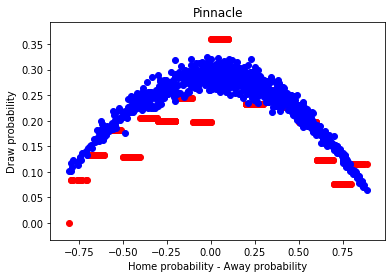

In [13]:
data["bins"] = pd.cut(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_PS'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], data['draw_mean_PS'], color = 'red')
_ = plt.scatter(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], data['PS_norm_prob_draw'], color = 'blue')
_ = plt.title('Pinnacle')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can give the same winning strategy for the range between 0 and 0.1.

### 2.3 Task 3

In some matches, there are some events that can affect the outcome of the game. Getting a red card in the early time of a match can be result as a lose. So, we can look the odds of the matches without any red card and try eliminate any noise in the data. The filtering operation can be done like this.

In [14]:
data3 = data[data['HR'] + data['AR'] == 0]

We can do the similar processes for this data.

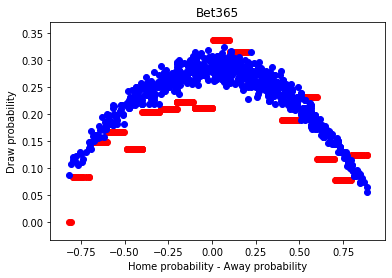

In [15]:
data3["bins"] = pd.cut(data3["B365_norm_prob_home"] - data3["B365_norm_prob_away"], bins=bin_cond, labels=bin_lab)

data3["FTR_draw"] = data3["FTR"].apply(lambda x: 1 if x == 'D' else 0)
FTR_draw = data3.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data3['draw_mean_B365'] = pd.merge(data3, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data3["B365_norm_prob_home"] - data3["B365_norm_prob_away"], data3['draw_mean_B365'], color = 'red')
_ = plt.scatter(data3["B365_norm_prob_home"] - data3["B365_norm_prob_away"], data3['B365_norm_prob_draw'], color = 'blue')
_ = plt.title('Bet365')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

For Bet365, we can see that betting for draw strategy is also a winning for the range between 0.1 and 0.2 and the range between 0.5 and 0.6. It means that having a red card effect the odds of the Bet365 bookmaker.

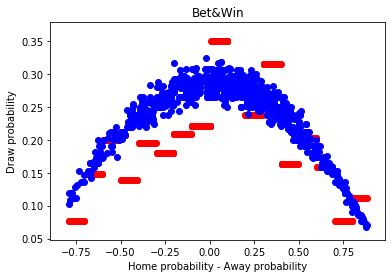

In [16]:
data3["bins"] = pd.cut(data3["BW_norm_prob_home"] - data3["BW_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data3.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data3['draw_mean_BW'] = pd.merge(data3, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data3["BW_norm_prob_home"] - data3["BW_norm_prob_away"], data3['draw_mean_BW'], color = 'red')
_ = plt.scatter(data3["BW_norm_prob_home"] - data3["BW_norm_prob_away"], data3['BW_norm_prob_draw'], color = 'blue')
_ = plt.title('Bet&Win')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can say that there is no difference for Bet&Win bookmaker after removing the noisy matches.

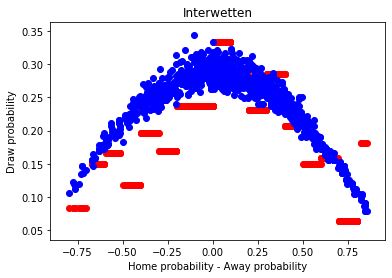

In [17]:
data["bins"] = pd.cut(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_IW'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], data['draw_mean_IW'], color = 'red')
_ = plt.scatter(data["IW_norm_prob_home"] - data["IW_norm_prob_away"], data['IW_norm_prob_draw'], color = 'blue')
_ = plt.title('Interwetten')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can say that there is no difference for Interwetten bookmaker after removing the noisy matches.

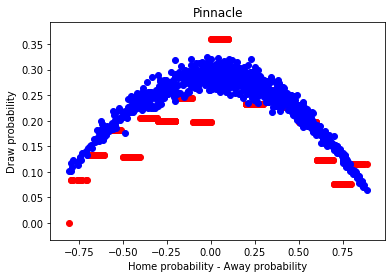

In [18]:
data["bins"] = pd.cut(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], bins=bin_cond, labels=bin_lab)

FTR_draw = data.groupby("bins").mean()["FTR_draw"].fillna(0).reset_index()
data['draw_mean_PS'] = pd.merge(data, FTR_draw, on='bins', how='left')['FTR_draw_y'].values

_ = plt.scatter(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], data['draw_mean_PS'], color = 'red')
_ = plt.scatter(data["PS_norm_prob_home"] - data["PS_norm_prob_away"], data['PS_norm_prob_draw'], color = 'blue')
_ = plt.title('Pinnacle')
_ = plt.xlabel("Home probability - Away probability")
_ = plt.ylabel("Draw probability")

From this plot, we can say that there is no difference for Pinnacle bookmaker after removing the noisy matches.

## RESOURCES

- [Data](https://www.football-data.co.uk/data.php)
- [Poisson Distribution](https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/R_Functions.py)
- [Statistical Football Modeling A Study of Football Betting and Implementation of Statistical Algorithms in Premier League](http://www.it.uu.se/edu/course/homepage/projektTDB/ht15/project16/Project16_Report.p0df)
- [Case When Example](https://stackoverflow.com/questions/54653356/case-when-function-from-r-to-python)